# Experiment `20200508a`

In [1]:

import numpy as np  

import pyUn0 as pyUn0
import os, plotly
import plotly.express as px
import plotly.graph_objects as go
import pickle

import os, plotly
import plotly.express as px
import plotly.graph_objects as go


from scipy.signal import hilbert

from scipy.signal import argrelextrema

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

Not loading RPi.GPIO as not on RPi
pyexiv2 does not exist on RPi


# Test of coffee + balls

### Importing acqs

252162 126081.0 126080
Data acquired
PyExiv not present
12608 10
PyExiv not present
1 Experiment: 20200508a-1
Duration: 197.0us (200000 - 3000), for 10 repeats each 5000.0us
Fech = 64.0Msps, total of 12608.0 pts per line, Nacq = 10
200ns at shooting time at 24V pulse, probe: bardrite, target = Bowl of jelly balls plus coffee



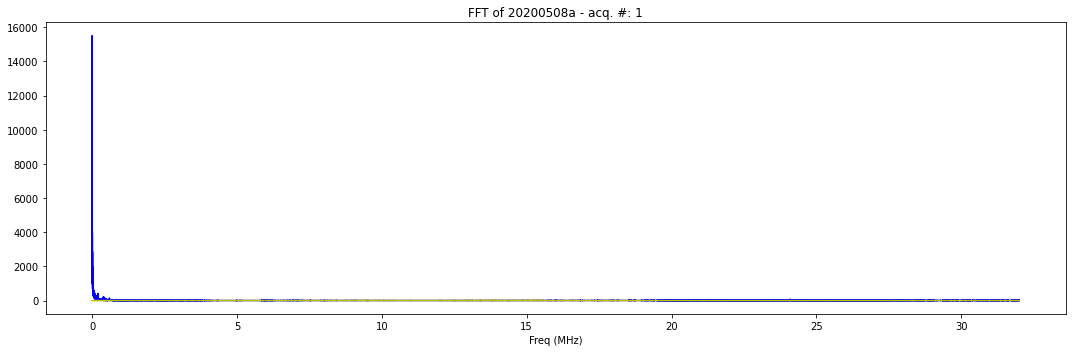

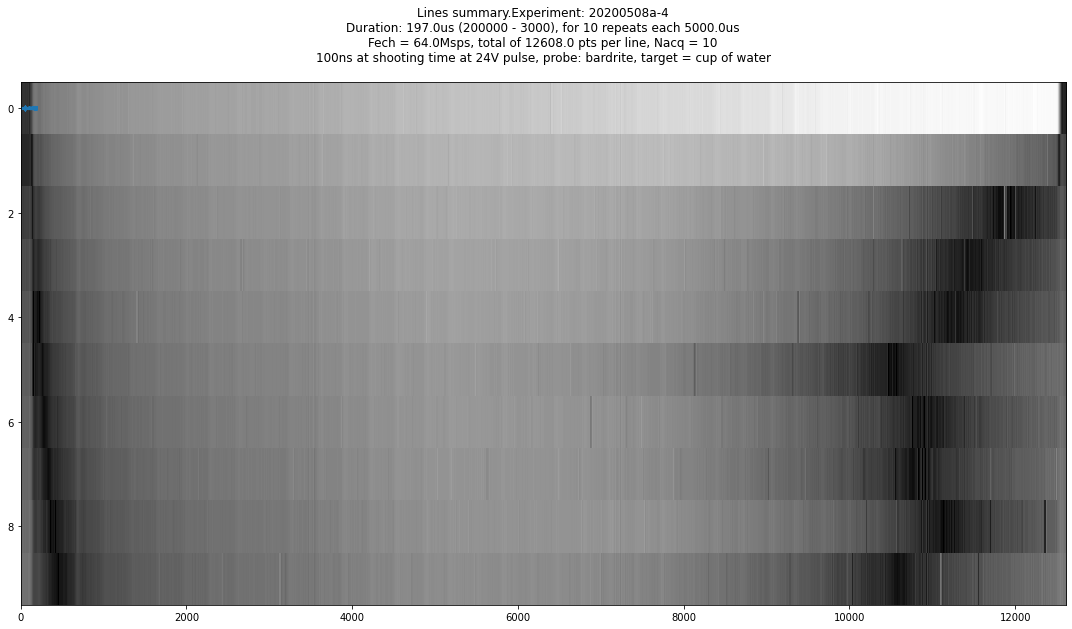

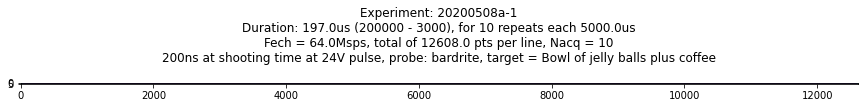

252162 126081.0 126080
Data acquired
PyExiv not present
12608 10
PyExiv not present
2 Experiment: 20200508a-2
Duration: 197.0us (200000 - 3000), for 10 repeats each 5000.0us
Fech = 64.0Msps, total of 12608.0 pts per line, Nacq = 10
200ns at shooting time at 24V pulse, probe: bardrite, target = Bowl of jelly balls plus coffee



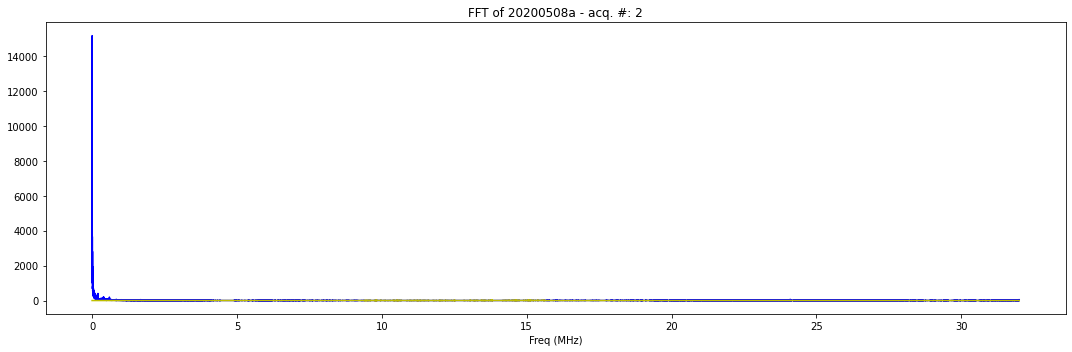

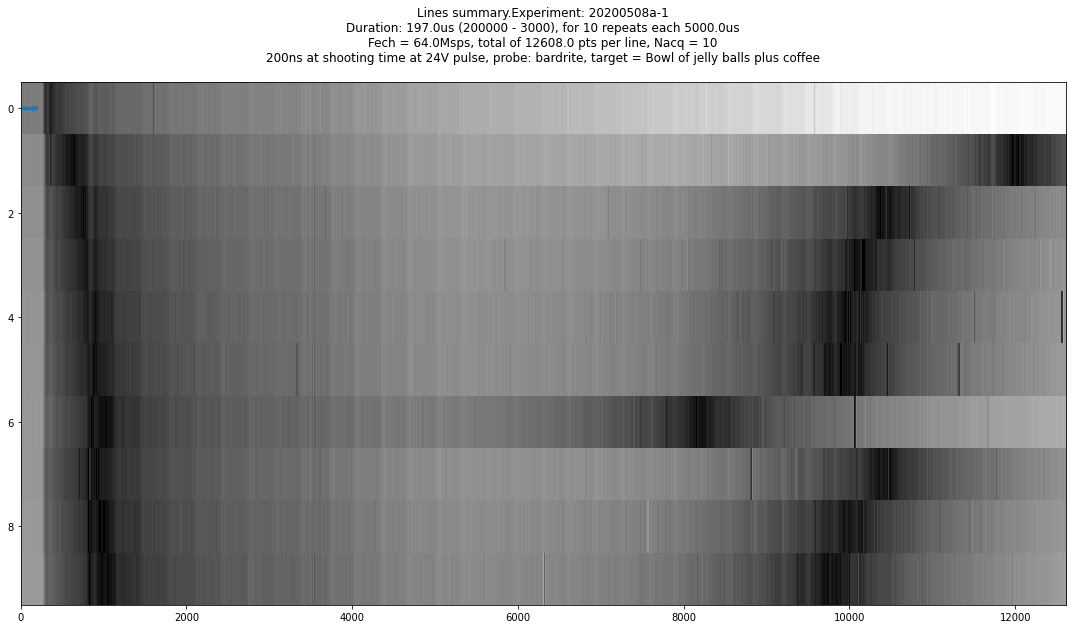

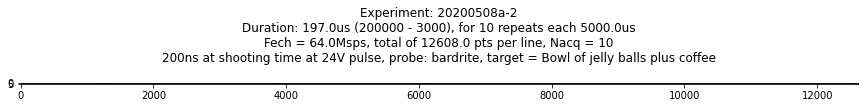

252162 126081.0 126080
Data acquired
PyExiv not present
12608 10
PyExiv not present
3 Experiment: 20200508a-3
Duration: 197.0us (200000 - 3000), for 10 repeats each 5000.0us
Fech = 64.0Msps, total of 12608.0 pts per line, Nacq = 10
200ns at shooting time at 24V pulse, probe: bardrite, target = Bowl of jelly balls plus coffee



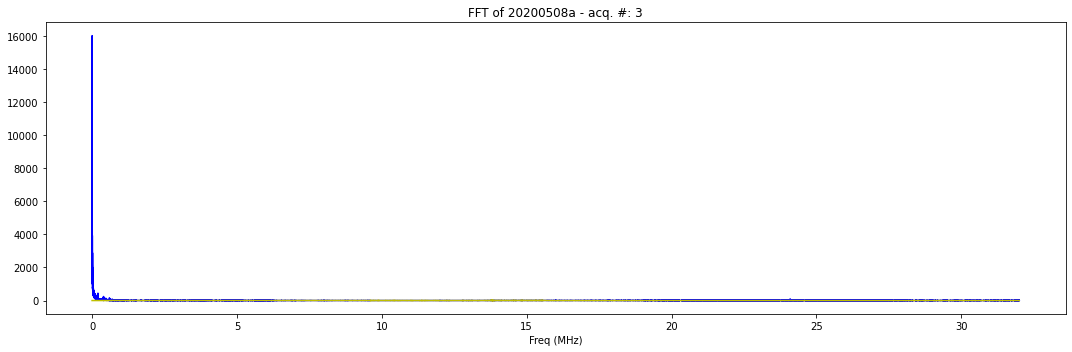

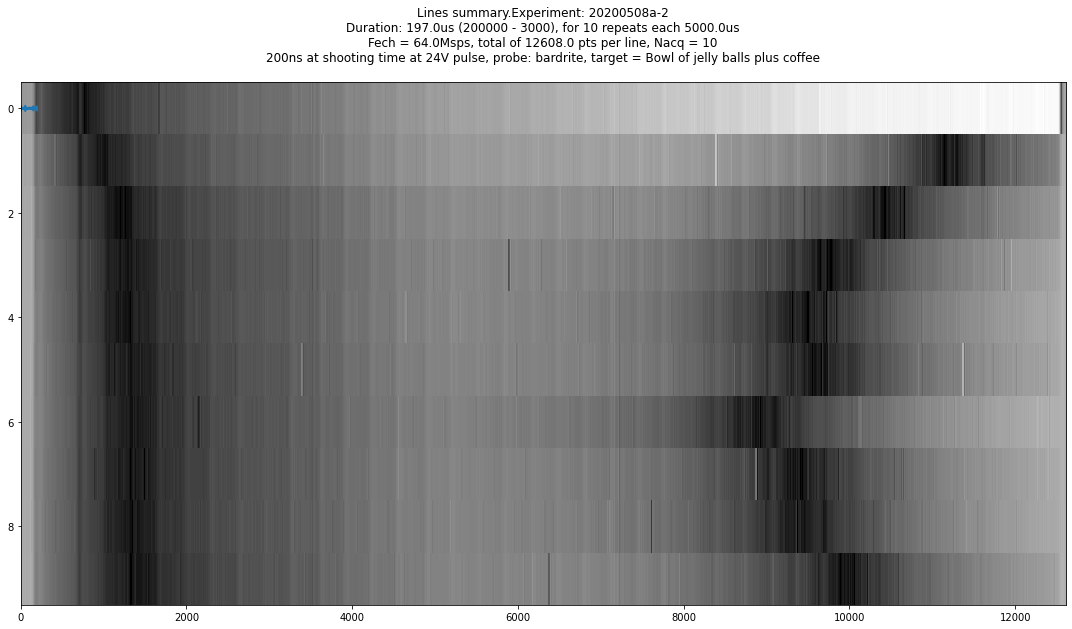

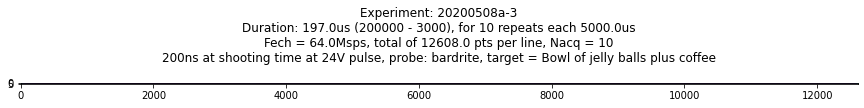

252162 126081.0 126080
Data acquired
PyExiv not present
12608 10
PyExiv not present
4 Experiment: 20200508a-4
Duration: 197.0us (200000 - 3000), for 10 repeats each 5000.0us
Fech = 64.0Msps, total of 12608.0 pts per line, Nacq = 10
100ns at shooting time at 24V pulse, probe: bardrite, target = cup of water



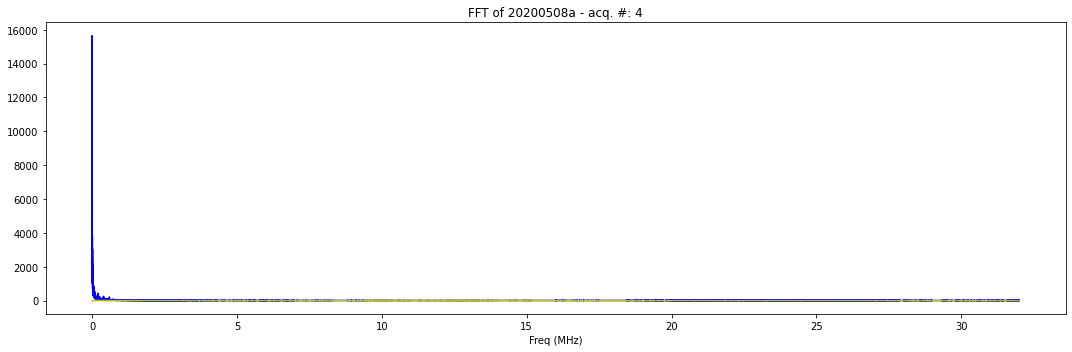

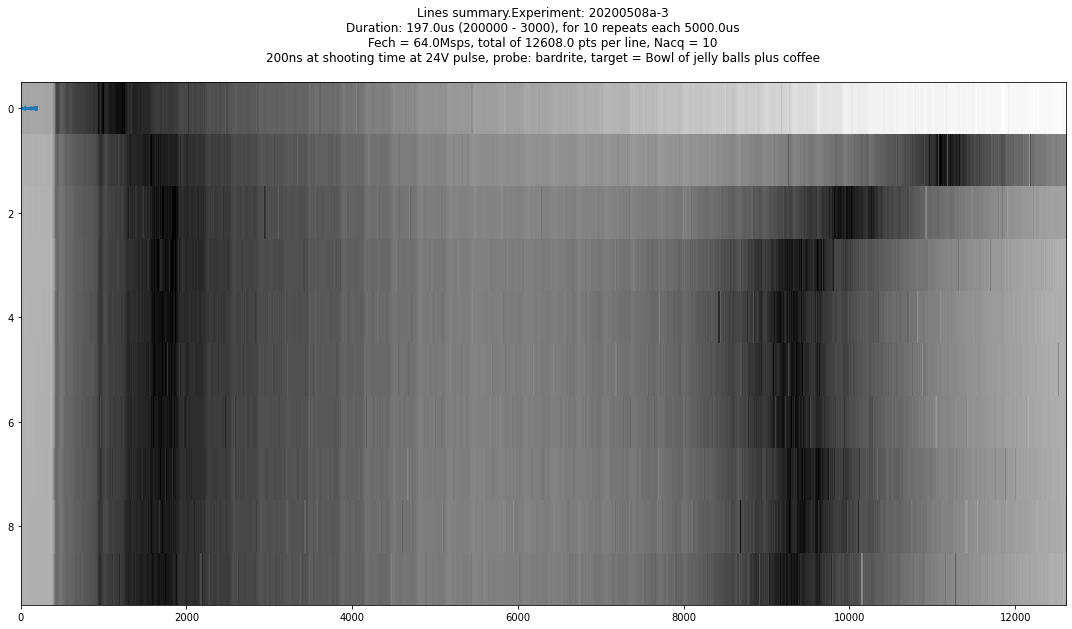

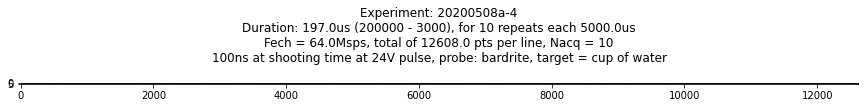

In [56]:

items = []
for kk in range(4):
    kk = kk+1
    uA = pyUn0.us_json()
    uA.JSONprocessing("data/20200508a-"+str(kk)+".json")

    uA.Bandwidth = 0.5 ## instead of 1 by default
    uA.fPiezo = 12.5
    uA.show_images = False
    
    uA.create_fft() 
    uA.mk2DArray()
    print(kk,uA.create_title_text())

    
    filtered = uA.mkFiltered( uA.raw_2d_image )
    uA_averaged = np.average(uA.raw_2d_image, axis=0)
    
    C  = np.sum(uA.filtered_image, axis = 0)
    plt.plot(uA.t[100:len(C)-100],C[100:len(C)-100])
    plt.title("Lines summary."+titleExpe)    
    plt.savefig("images/lines_"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")    
    plt.show()    
    plt.close()
    plt.imshow(np.sqrt(np.abs(uA.filtered_image)))
    titleExpe = uA.create_title_text()
    plt.title(titleExpe)
    plt.savefig("images/"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")
    plt.show()
    plt.close()   
    
    dbfile = open("data/"+uA.experiment['id']+str(uA.N)+".pkl", 'ab') 
    pickle.dump(uA, dbfile)                      
    dbfile.close() 
    items.append(uA)

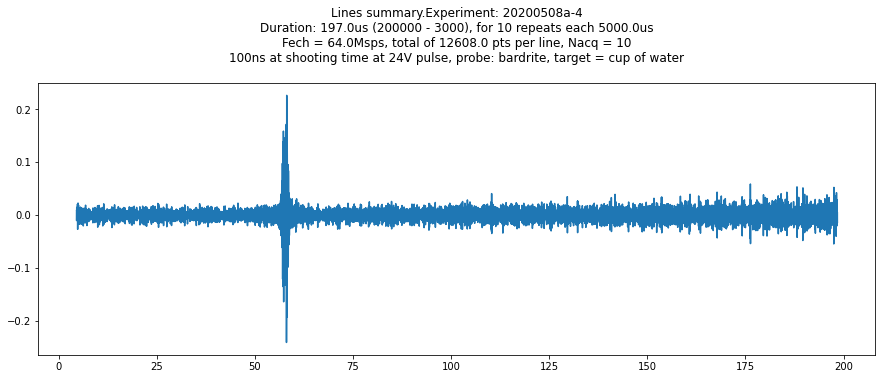

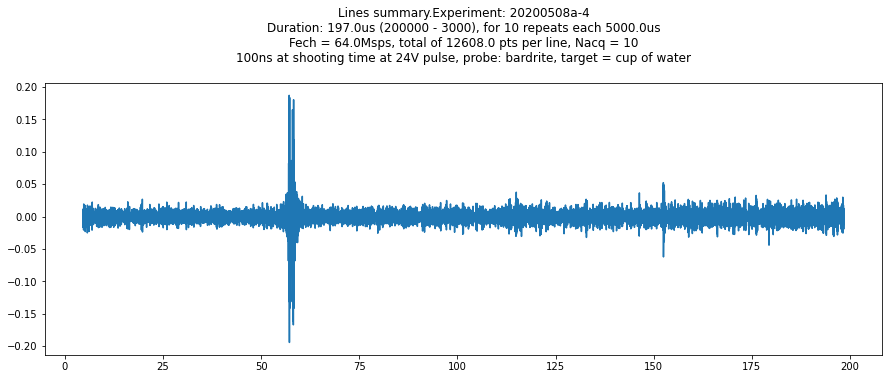

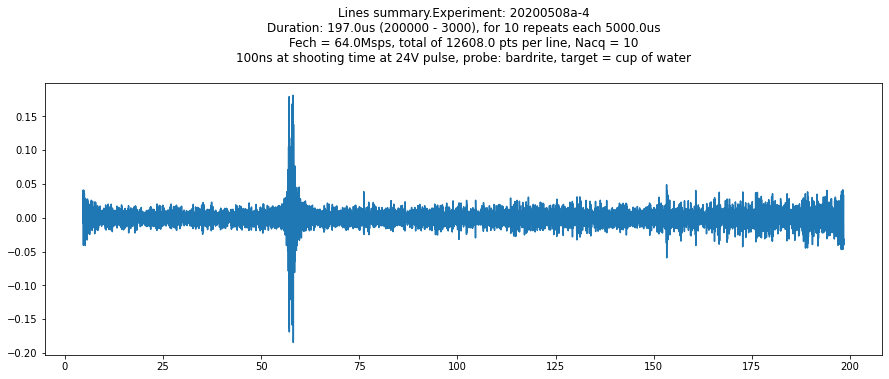

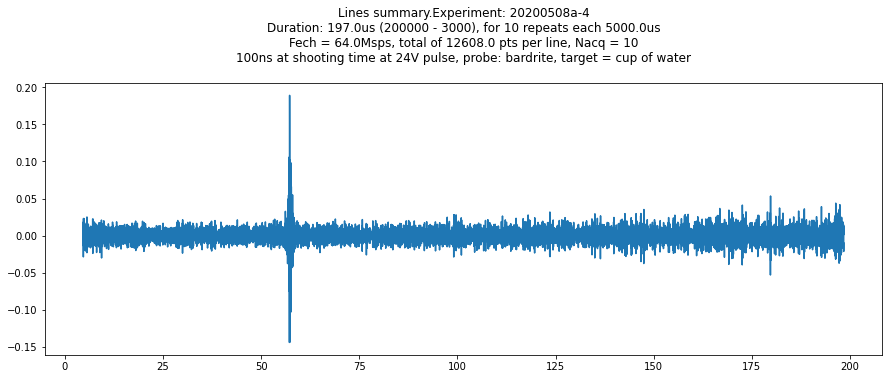

In [58]:
for uA in items:
    uA.Bandwidth = 1 ## instead of 1 by default
    uA.fPiezo = 12.5
    uA.show_images = False

    #uA.mk2DArray()
    filtered = uA.mkFiltered( uA.raw_2d_image )
    uA_averaged = np.average(uA.raw_2d_image, axis=0)

    C  = np.sum(uA.filtered_image, axis = 0)
    plt.figure(figsize=(15,5))
    plt.plot(uA.t[100:len(C)-100],C[100:len(C)-100])
    plt.title("Lines summary."+titleExpe)    
    plt.savefig("images/lines_"+uA.experiment['id']+str(uA.N)+"_bdwth_"+str(uA.Bandwidth)+".jpg")    